# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning)



# **Week 2**

## Introduction to statistics:

> “I couldn't claim that I was smarter than sixty-five other guys--but the average of sixty-five other guys, certainly!” 
>
> -- <cite>*Richard P. Feynman*, Surely You're Joking, Mr. Feynman!</cite>


### **Statistic** is a very broad subject of study, covering from data collection (designing surveys), organizing and preparing data, and making interpretation and analysis on the data and at the end presenting and visualizing the crux of the analysis in the meaningful way.

#### In this course we are going to discuss how can we clean up a given dataset, then analyze and visualize important information in it.

<hr></hr>

### First let's start with a quick exercise:

In [118]:
import numpy as np
import matplotlib.pyplot as plt

#### First we need a gaussian function. We can use built-in functions in numpy for getting a gaussian function. However, let's define it ourself  as an easy practice:


In [246]:
def Gaussian_prob(x, _mu=0, _sigma=1):
    """Gaussian distribution: probability of getting x given mu=_mu, sigma=_sigma"""
    return (1/np.sqrt(2*np.pi*_sigma**2))*np.exp(-(x-_mu)**2/(2*_sigma**2))

In [247]:
# initial configuration

x_span = np.linspace(0,20, 1000)
mu, sigma = 10, 5

prob_list = [Gaussian_prob(x, mu, sigma) for x in x_span]

### Another equivalent way of doing the above but using the numpy arrays. (Be very careful when writing a code this way, since the code above works for any object that is iterable; but, the method used below can only be applied for the **numpy array object** and **not a list**. 

In [248]:
prob_np_array = Gaussian_prob(x_span, mu, sigma)

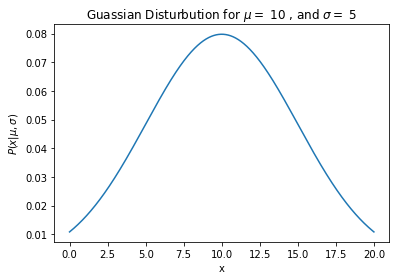

In [249]:
plt.plot(x_span, prob_list)

plt.title("Gaussian Distribution for $\mu=$ {} , and $\sigma=$ {}".format(mu, sigma))
plt.xlabel(r"x")
plt.ylabel(r"$P(x|\mu, \sigma)$")

plt.show()

### **Perfect!!**

#### Now that we have our gaussian function let's start doing some estimation!

<hr>

## **Particle X** 
### What is the **True** mass of the newly discovered X particle?

<hr>

#### Imagine that you are a Primary investigator for one particular experiment done at the [**CERN**](https://home.cern/) (The world's most powerful particle accelerator). There was a new experiment which led to the discovery of particle X. But, there has been a lot of debate about the true mass of the particle. So, you asked **ATLAS** and **CMS** team to measure the mass of the particle completely separate from each other. (These are two separate detector at CERN) They gave you the following results for the mass and the corresponding error. (in  an unknown unit!!!)

In [177]:
mass_atlas, mass_err_atlas = 10.12, 3.7
mass_cms, mass_err_cms = 7.42, 1.6

#### You have to hold a news conference to announce the discovery as well as the measured mass. So, how can you find the value for the true mass of the particle? In other words, how can you find this value, using **all** the information about this two measurement?

#### The easiest way that comes to mind is two report the average of these values:

In [179]:
mass_average = (mass_atlas+mass_cms)/2
print(mass_average)

8.77


#### <span style="color:red">_But there is huge problem with this analysis!!!_</span>

#### The lead investigator of the CMS team calls you and asks for an explanation for your decision to report the average. Since, he argues that the measurement done by ATLAS team is not as valid as CMS team since the ATLAS team have much higher uncertainty in their experiment. But in your analysis, you are giving both these measurements the same weight by averaging them. **How can you take into account the difference in uncertainty in your analysis?**

$ X_1 $: mass_atlas, mass_err_atlas  
$ X_2 $: mass_atlas, mass_err_atlas  

#### Basically, what is the $p(m_X|X_1, X_2)$ (probability distribution of the mass of X given two sets of measurements ($X_1, X_2$))?

> “Probability is orderly opinion and inference from data is nothing other than the revision of such opinion in the light of relevant new information.” 
>
> -- <cite>*Eliezer S. Yudkowsky*</cite> 

### **Thomas Bayes**' theorem to the rescue!!
#### Luckily we can approach this problem in a Bayesian framework. Which basically let us update our belief (knowledge/information) in a consistent way when we get new information.

<hr>

#### According to Bayes:
####  $p(m_X|X_1, X_2) \varpropto p(X_1, X_2|m_X)$ 
#### This is much easier to handle since we can assume some models for $ p(X_1, X_2|m_X)$. (We don't need to take care about the normalization here, we are going to get there next week)

### **First let's make some assumptions:**
#### **1. Bayesian statistics works!**
#### **2. The measurements are independent. $ p(X_1, X_2|m_X) = p(X_1|m_X)*p(X_1|m_X)$**
#### **3. Measurements follow a random Gaussian distribution. $PDF(m_{measured})=Gaussian(m_{measured}, \sigma_{measured})$**
#### **4. We have no other information about $m_X$, so we can assume the simplest form which is uniform (tophat) probability distribution (prior) for this quantity. (quantity that we are looking for)**

<hr>

### <span style="color:#000066">**Let's calculate the $p(X_1|m_X)$ for different values of $m_X$:**</span>

#### <span style="color:#000066">**Start by sampling potential values for m_X**<span>


In [242]:
m_X_span= np.arange(0, 25, 0.001)

#### <span style="color:#000066">**Making two arrays of zeros for storing the probabilities**<span> 

In [243]:
prob_atlas=np.zeros(len(m_X_span))
prob_cms=np.zeros(len(m_X_span))

#### <span style="color:#000066">**Building the joint pdf [p(X1, X2)]**<span> 

In [244]:
for i, m in enumerate(m_X_span):
    prob_atlas[i]=Gaussian_prob(mass_atlas, _mu=m, _sigma=mass_err_atlas)
    prob_cms[i]=Gaussian_prob(mass_cms, _mu=m, _sigma=mass_err_cms)

#### <span style="color:#000066">**Finding the joint distribution**<span>

In [203]:
joint_prob = prob_atlas*prob_cms

#### <span style="color:#000066">**Since we use the Uniform  prior for $m_X$, it is very easy to find the normalization; we can sum over all the elements of the probability vector**<span>

In [227]:
Normalization = len(m_X_span)/(sum(joint_prob)*(max(m_X_span)-min(m_X_span)))
joint_prob_normalized = joint_prob*Normalization

#### <span style="color:#000066">**Finding the mass corresponding to the highest probability. (So this is the most probable value)**<span>

In [228]:
m_X_max_prob = m_X_span[joint_prob==max(joint_prob)]

#### <span style="color:#000066">**Plotting the pdf for the two measurements + joint pdf normalized and unnormalized:**<span>
                                                                                    

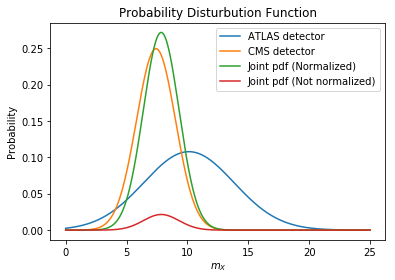

In [236]:
plt.plot(m_X_span, prob_atlas, label="ATLAS detector")
plt.plot(m_X_span, prob_cms, label="CMS detector")

plt.plot(m_X_span, joint_prob_normalized, label="Joint pdf (Normalized)")
plt.plot(m_X_span, joint_prob, label="Joint pdf (Not normalized)")

plt.title(r"Probability Distribution Function")
plt.xlabel(r"$m_X$")
plt.ylabel(r"Probability")

plt.legend()
plt.show()

#### <span style="color:#000066">**As you can see in the plot the joint pdf is much closer to the CMS team results rather than ATLAS team measurement; which was expected from their uncertainties. This is the value of mass you can report:**<span>

In [238]:
print(m_X_max_prob)

[7.845]


### There is an analytical way of getting to the same results, since we are working with gaussian functions which have very special properties. One that we need is the following:
#### **$Gaussian(\mu_1,\sigma_1)*Gaussian(\mu_2,\sigma_2)=Gaussian(\frac{\mu_1\sigma_2^2+\mu_2\sigma_1^2}{\sigma_1^2+\sigma_2^2},\frac{\sigma_1\sigma_2}{\sqrt{\sigma_1^2+\sigma_2^2}})$**

In [239]:
def two_gaussian(mu1,mu2,sigma1,sigma2):
    return (mu1*sigma2**2+mu2*sigma1**2)/(sigma1**2+sigma2**2), (sigma2*sigma1)/np.sqrt(sigma1**2+sigma2**2)

In [240]:
two_gaussian(mass_cms, mass_atlas, mass_err_cms, mass_err_atlas)

(7.845353846153847, 1.4685712575362284)

### **Which as you can see agrees with our result from the sampling method.**